In [1]:
import numpy as np
import networkx as nx
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import font_manager

fontP = font_manager.FontProperties()
fontP.set_family("XHei NF")
fontP.set_size(4)


In [2]:
raw_data = pd.read_csv("data/desens.csv")
raw_data["认识的三位同学"] = raw_data["认识的三位同学"].str.split("; ")
raw_data.drop(columns=["序号"], inplace=True)
raw_data


,你的姓名,认识的三位同学
0,范琳,[李淑珍]
1,刘荣,"[杨秀珍, 谢艳, 冯欢]"
2,唐建军,"[王浩, 杨秀珍]"
3,曾雪梅,[成丹]
4,滕玉兰,"[杨冬梅, 张鑫]"
5,张帅,[庞云]
6,郑俊,[李秀兰]
7,艾建,"[刘勇, 黄伟, 施璐]"
8,田桂英,[田桂英]
9,唐建军,"[王浩, 杨秀珍]"


In [3]:
_uniq_names = set()
for names in raw_data["认识的三位同学"]:
    _uniq_names.update(names)
for name in raw_data["你的姓名"]:
    _uniq_names.add(name)
uniq_names = list(_uniq_names)
uniq_names


['庞云',
 '刘勇',
 '高倩',
 '苏秀云',
 '慕强',
 '郑俊',
 '李娜',
 '苏岩',
 '徐欢',
 '严平',
 '单颖',
 '杜军',
 '田丹',
 '曾雪梅',
 '张淑华',
 '潘丽',
 '艾建',
 '张帅',
 '李东',
 '张鑫',
 '刘阳',
 '黄玉梅',
 '孙桂英',
 '黄伟',
 '谢艳',
 '李秀兰',
 '唐建军',
 '董坤',
 '冯欢',
 '范辉',
 '田明',
 '邹博',
 '刘荣',
 '李淑珍',
 '章颖',
 '李建',
 '成丹',
 '范琳',
 '赵瑜',
 '施璐',
 '李利',
 '滕玉兰',
 '覃军',
 '黄燕',
 '任小红',
 '王兰英',
 '雷丽',
 '刘芳',
 '王浩',
 '娄淑英',
 '李岩',
 '杨冬梅',
 '杨秀珍',
 '庞雷',
 '田桂英']

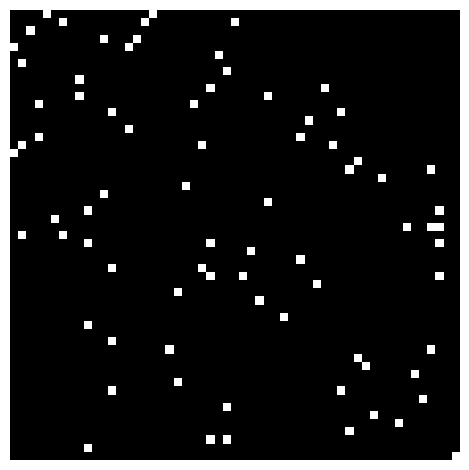

In [4]:
Adj = np.zeros((len(uniq_names), len(uniq_names)), dtype=bool)
for _from, _tos in raw_data[["你的姓名", "认识的三位同学"]].values:
    for _to in _tos:
        Adj[uniq_names.index(_from), uniq_names.index(_to)] = True

plt.imshow(Adj, cmap="gray")
plt.axis("off")
plt.tight_layout()
plt.savefig("image/AdjacencyMatrix.svg", transparent=True)
plt.show()


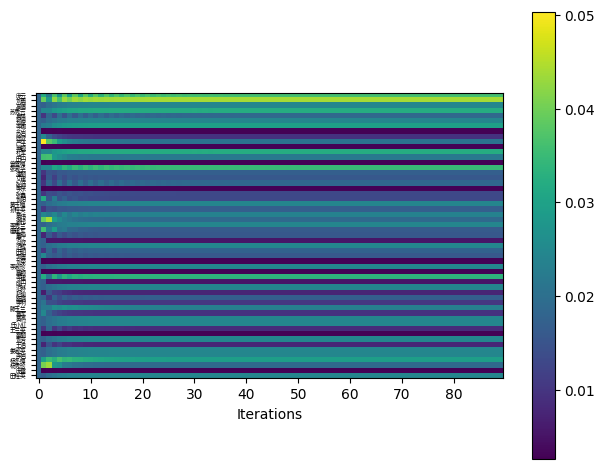

In [5]:
def PageRank(ranks: np.ndarray, adj: np.ndarray, shrink: float):
    out = adj.sum(axis=0)
    # Avoid Division by Zero error
    out[out == 0] = 1
    # Update new values
    new_ranks = (adj / out[:, None]).T @ ranks
    # Shrink
    new_ranks *= shrink
    # Compensate
    new_ranks += (1 - shrink) / len(ranks)
    # Normalize
    new_ranks /= new_ranks.sum()
    return new_ranks


S = 0.85

last_ranks = np.zeros(len(uniq_names))
ranks = np.ones(len(uniq_names)) / len(uniq_names)
history: list[np.ndarray] = []

while not np.allclose(last_ranks, ranks):
    last_ranks = ranks
    history.append(ranks)
    ranks = PageRank(ranks, Adj, S)

history_image = np.stack(history, axis=0)

plt.imshow(history_image.T)
plt.xlabel("Iterations")
plt.yticks(range(len(uniq_names)), uniq_names, fontproperties=fontP)
plt.colorbar()
# plt.axis("off")
plt.tight_layout()
plt.savefig("image/PageRankIterations.svg", transparent=True)
plt.show()


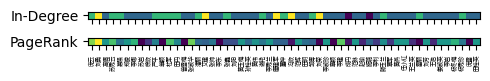

In [6]:
stable_ranks = ranks
in_degree = Adj.sum(axis=1)

fig, axs = plt.subplots(ncols=1, nrows=2, sharex=True, figsize=(5, 1))
axs[0].imshow(in_degree[None, :])
axs[0].set_yticks([0], ["In-Degree"])
axs[1].imshow(stable_ranks[None, :])
axs[1].set_yticks([0], ["PageRank"])
axs[1].set_xticks(range(len(uniq_names)), uniq_names, fontproperties=fontP, rotation=90)
plt.tight_layout()
plt.savefig("image/PageRankComparison.svg", transparent=True)
plt.show()


In [7]:
df = pd.DataFrame({"name": uniq_names, "in_deg": in_degree, "pagerank": stable_ranks})
df.to_csv("data/result.csv", index=False)
